In [1]:
# Import necessary libraries
import pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 
import pandas as pd

# pip install SQLAlchemy

# Connect to SQL server and connect to Books table. Assign the table data to a pandas DataFrame.
Server = 'DESKTOP-13K0I1P'
try:
    sqlServerConnection = pyodbc.connect('Driver={SQL Server};'
                      f'Server={Server};'
                      'Database=Books;'
                      'Trusted_Connection=yes;')
    SQL_read_query = pd.read_sql_query('SELECT * FROM Books', sqlServerConnection)

    # Create cursor connection to db
    df = pd.DataFrame(SQL_read_query, columns=['title', 'price', 'in_stock', 'rating', 'genre', 'upc', 'description'])
    print("The Books database from SqlServer is connected. Completing reading Books table.")
except pyodbc.Error as error:
    print("Error while connecting to SqlServer - ", error)
finally:
    if sqlServerConnection:
        sqlServerConnection.close()
        print("The SqlServer connection is closed")

The Books database from SqlServer is connected. Completing reading Books table.
The SqlServer connection is closed


In [2]:
df.head()

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...


In [3]:

# Summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN (Not a Number) values.
df.describe()

,price,in_stock
count,14.000000,14.00000
mean,36.480714,19.50000
std,16.436539,0.85485
min,13.990000,19.00000
25%,21.145000,19.00000
50%,40.580000,19.00000
75%,52.055001,20.00000
max,54.230000,22.00000


In [4]:
# Please note that the DATA have 1000 rows
df

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
5,The Requiem Red,22.650000,19,one,Young Adult,f77dbf2323deb740,Patient Twenty-nine.A monster roams the halls ...
6,The Dirty Little Secrets of Getting Your Dream...,33.340000,19,four,Business,2597b5a345f45e1b,Drawing on his extensive experience evaluating...
7,The Coming Woman: A Novel Based on the Life of...,17.930000,19,three,Default,e72a5dfc7e9267b2,"""If you have a heart, if you have a soul, Kare..."
8,The Boys in the Boat: Nine Americans and Their...,22.600000,19,four,Default,e10e1e165dc8be4a,For readers of Laura Hillenbrand&#39;s Seabisc...
9,The Black Maria,52.150002,19,one,Poetry,1dfe412b8ac00530,"Praise for Aracelis Girmay:""[Girmay&#39;s] eve..."


<AxesSubplot:title={'center':'FREQUENCIES OF GENRES VARIBLE LEVELS'}, xlabel='genre'>

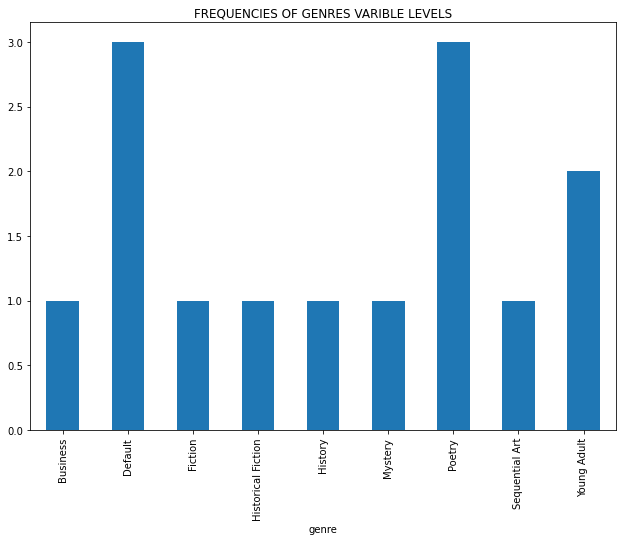

In [5]:
# What are the top GENRES?    
''' IMPORTANT: Please note that we need to CLEAN THE DATA (DROP Default and DROP Add a comment) '''

cut_freq_table = pd.crosstab(index=df['genre'], columns='freq')
cut_freq_table.plot(kind='bar', figsize=(10.5, 7.5), title = "FREQUENCIES OF GENRES VARIBLE LEVELS", legend= False )

In [6]:
'''
============================================== We need to clean this Data 67 rows ========================================================

'''
# We are going to delete the genre ===> "Add a comment"
df[df['genre']=='Add a comment']

,title,price,in_stock,rating,genre,upc,description


In [7]:
'''============================================== We need to clean this Data 152 ========================================================
'''
# We are going to delete the genre ===> "Default"
df[df['genre']=='Default']

,title,price,in_stock,rating,genre,upc,description
7,The Coming Woman: A Novel Based on the Life of...,17.93,19,three,Default,e72a5dfc7e9267b2,"""If you have a heart, if you have a soul, Kare..."
8,The Boys in the Boat: Nine Americans and Their...,22.60,19,four,Default,e10e1e165dc8be4a,For readers of Laura Hillenbrand&#39;s Seabisc...
10,"Starving Hearts (Triangular Trade Trilogy, #1)",13.99,19,two,Default,0312262ecafa5a40,"Since her assault, Miss Annette Chetwynd has b..."


In [8]:
# Get the indices where genre is default and get indices where genre is Add a comment
'''
==============================================   Cleaning Data 152 rows + 67 = 219 rows  =====================================
'''
indices_genre_default=list(df.index[df['genre']=='Default'])
indices_genre_add_coment=list(df.index[df['genre']=='Add a comment'])
#indices_genre_default
#indices_genre_add_coment
clean_default=df.drop(indices_genre_default)
clean_data=clean_default.drop(indices_genre_add_coment)

''' THIS IS MY CLEAN DATA with 781 rows                       we no longer use df and now we are going to use only clean_data'''
clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
5,The Requiem Red,22.650000,19,one,Young Adult,f77dbf2323deb740,Patient Twenty-nine.A monster roams the halls ...
6,The Dirty Little Secrets of Getting Your Dream...,33.340000,19,four,Business,2597b5a345f45e1b,Drawing on his extensive experience evaluating...
9,The Black Maria,52.150002,19,one,Poetry,1dfe412b8ac00530,"Praise for Aracelis Girmay:""[Girmay&#39;s] eve..."
11,Shakespeare&#39;s Sonnets,20.660000,19,four,Poetry,30a7f60cd76ca58c,This book is an important and complete collect...
12,Set Me Free,17.459999,19,five,Young Adult,ce6396b0f23f6ecc,Aaron Ledbetterâ??s future had been planned ou...


In [9]:
# I will change the 

clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
5,The Requiem Red,22.650000,19,one,Young Adult,f77dbf2323deb740,Patient Twenty-nine.A monster roams the halls ...
6,The Dirty Little Secrets of Getting Your Dream...,33.340000,19,four,Business,2597b5a345f45e1b,Drawing on his extensive experience evaluating...
9,The Black Maria,52.150002,19,one,Poetry,1dfe412b8ac00530,"Praise for Aracelis Girmay:""[Girmay&#39;s] eve..."
11,Shakespeare&#39;s Sonnets,20.660000,19,four,Poetry,30a7f60cd76ca58c,This book is an important and complete collect...
12,Set Me Free,17.459999,19,five,Young Adult,ce6396b0f23f6ecc,Aaron Ledbetterâ??s future had been planned ou...


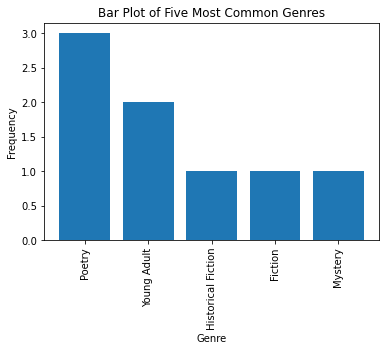

In [10]:


genre_dict = dict(Counter(clean_data['genre']).most_common(5))
genre_dict
plt.bar(genre_dict.keys(), genre_dict.values())

plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Bar Plot of Five Most Common Genres')
plt.xticks(rotation=90)
plt.show()

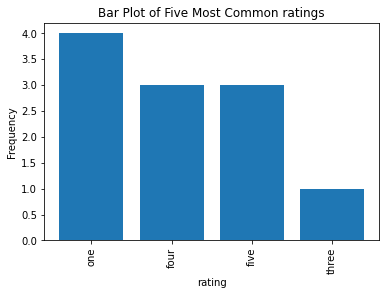

In [11]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt

genre_dict = dict(Counter(clean_data['rating']).most_common(5))
genre_dict
plt.bar(genre_dict.keys(), genre_dict.values())

plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Bar Plot of Five Most Common ratings')
plt.xticks(rotation=90)
plt.show()

In [12]:
clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description


In [13]:
clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description


In [14]:
# The assumption here is in order to determine the number of books that are more 
# sold based on their genre, rate, and the less number in the stock.
NonfictionTop5SoldBooks=[clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
NonfictionTop5SoldBooks

[Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: []]

In [15]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
13,Scott Pilgrim&#39;s Precious Little Life (Scot...,52.290001,19,five,Sequential Art,3b1c02bac2a429e6,Scott Pilgrim&#39;s life is totally sweet. He&...


In [16]:
clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description


In [17]:
# The assumption here is in order to determine the number of books that are more 
# sold based on their genre, rate, and the less number in the stock.
SequentialArtTop5SoldBooks=[clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
SequentialArtTop5SoldBooks

[Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: []]

In [18]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description


In [19]:
clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description


In [20]:
fictionTop5SoldBooks=[clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
fictionTop5SoldBooks

[Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: []]

In [21]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description
12,Set Me Free,17.459999,19,five,Young Adult,ce6396b0f23f6ecc,Aaron Ledbetterâ??s future had been planned ou...


In [22]:
clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description


In [23]:
youngAdultTop5SoldBooks=[clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
youngAdultTop5SoldBooks

[Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: []]

In [24]:
# Tell me all the genre that are 'Sequential Art' that have rating five
clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five')]

,title,price,in_stock,rating,genre,upc,description


In [25]:
clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five') & (clean_data['in_stock']<10)]

,title,price,in_stock,rating,genre,upc,description


In [26]:
fantasyTop5SoldBooks=[clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five') & (clean_data['in_stock']<5)]]
fantasyTop5SoldBooks

[Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: []]

In [27]:
# I want a list of the top sold books based on their top 5 genres AND rating= five AND in-stock < 5 
Top5Soldbooksbytop5genres=NonfictionTop5SoldBooks + SequentialArtTop5SoldBooks + fictionTop5SoldBooks + youngAdultTop5SoldBooks + fantasyTop5SoldBooks
Top5Soldbooksbytop5genres

[Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: [],
 Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: [],
 Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: [],
 Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: [],
 Empty DataFrame
 Columns: [title, price, in_stock, rating, genre, upc, description]
 Index: []]

In [28]:
# ratingFiveNonfiction    - This variable carries all books that are Nonfiction that have a rate     = five
# ratingFiveSequentialArt - This variable carries all books that are Sequential Art that have a rate = five
# ratingFiveFiction       - This variable carries all books that are Fiction and have a rate         = five
# ratingFiveYoungAdult    - This variable carries all books that are Young Adult and have a rate     = five
# ratingFiveYoungFantasy  - This variable carries all books that are Fantasy and have a rate         = five

ratingFiveNonfiction=[clean_data[(clean_data['genre']=='Nonfiction') & (clean_data['rating']=='five')]]
ratingFiveSequentialArt=[clean_data[(clean_data['genre']=='Sequential Art') & (clean_data['rating']=='five')]]
ratingFiveFiction=[clean_data[(clean_data['genre']=='Fiction') & (clean_data['rating']=='five')]]
ratingFiveYoungAdult=[clean_data[(clean_data['genre']=='Young Adult') & (clean_data['rating']=='five')]]
ratingFiveYoungFantasy=[clean_data[(clean_data['genre']=='Fantasy') & (clean_data['rating']=='five')]]


C:\Users\baoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


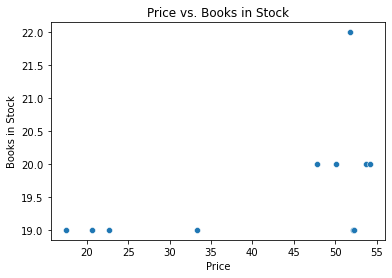

In [29]:
# This grath PRICE VS Books in Stock informs us about: SCATTERPLOAT
#          3)We need to check the Highest number of books in stock (22 Books)                  df[df['in_stock']>20]
#          4)We need to check the Highest price  of the books in this dataset($60.00)          df[df['price']>=59.99]
#          5)We need to check the cheapest book in the dataset                                 df[df['price']<=10]      
'''
The outlayers in the graph we can see in the y-axis(Books in-stock): 22 Books in stock, which title is: A Light in the Attic
We can check the highest number of books in the stock:  df[df['in_stock']>20] --- check line 16 of this jupyter notebook.
'''

sns.scatterplot(clean_data['price'], clean_data['in_stock'])

plt.title('Price vs. Books in Stock')

plt.ylabel('Books in Stock')

plt.xlabel('Price')

plt.show()

In [30]:
# This is the Book the have more in stock.
clean_data[clean_data['in_stock']>20]

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.77,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...


In [31]:
 # This is the most expensive Book
clean_data[clean_data['price']>59.99]

,title,price,in_stock,rating,genre,upc,description


In [32]:
 # This is the cheapest Book
clean_data[clean_data['price']<=10]

,title,price,in_stock,rating,genre,upc,description


Printing the dict:  {'five': 3, 'four': 3, 'one': 4, 'three': 1}


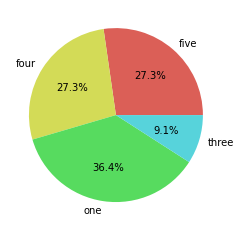

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cut_Series = clean_data['rating']
    
rating_frequency_dictionary={}
for word in sorted(cut_Series):
    if word in rating_frequency_dictionary:
        rating_frequency_dictionary[word]+=1
    else:
        rating_frequency_dictionary[word]=1
print("Printing the dict: ",rating_frequency_dictionary)
        
# Data to plot
labels = []
data = []

for key, value in (rating_frequency_dictionary.items()):
    labels.append(key)
    data.append(value)
    
# Plot
colors = sns.color_palette('hls')
plt.pie(data, labels=labels, colors=colors, autopct = '%1.1f%%')

#plt.legend()
plt.show()    


---- 5 unique values in rating
['three' 'one' 'four' 'five' 'two']
---- 9 unique values in genre
['Poetry' 'Historical Fiction' 'Fiction' 'Mystery' 'History' 'Young Adult'
 'Business' 'Default' 'Sequential Art']


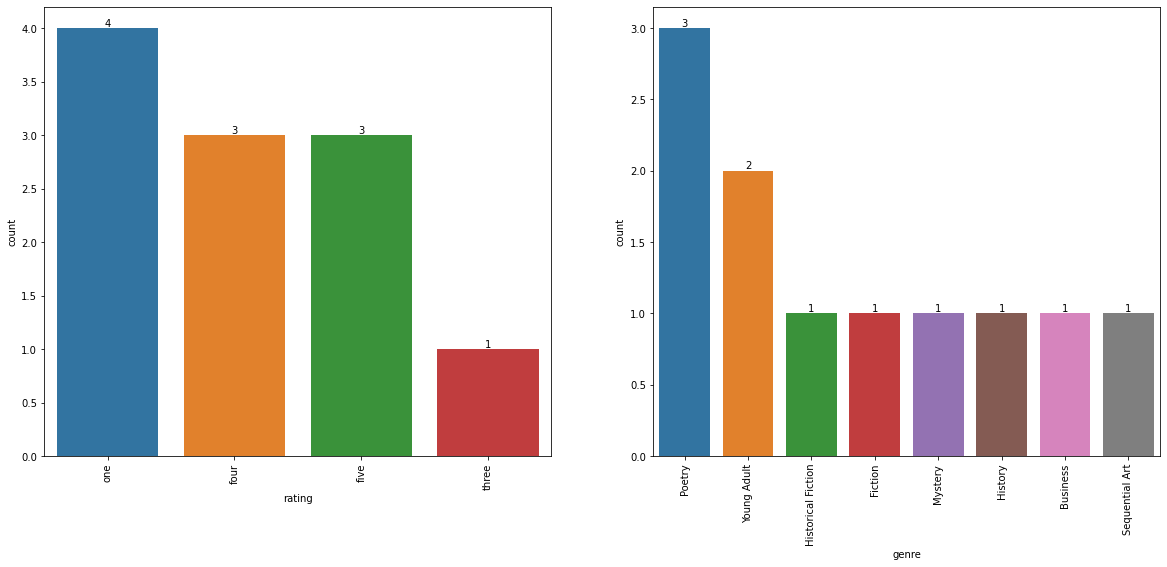

In [34]:
'''
===========================================  VAN I AM USING YOUR CODE WITH THE CLEAN DATA ================================================================================

'''

# Relevant numerical column
numerical_columns = ['price','in_stock']
categorical_columns = ['rating','genre']

# Unique values in categorical columns
fig, axs = plt.subplots(ncols=2,figsize=(20, 8.27))
for index,column in enumerate(categorical_columns):
    print('---- ' + str(len(df[column].unique())) + ' unique values in ' + column  )
    
    print(df[column].unique())
    
    chart = sns.countplot(x=clean_data[column],ax=axs[index],order=clean_data[column].value_counts().index)
    chart.bar_label(chart.containers[0])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [35]:
clean_data.head()

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,three,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,one,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,one,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...


In [36]:
clean_data['rating'] = clean_data['rating'].replace(['one','two','three','four','five'],[1,2,3,4,5])

In [37]:
clean_data

,title,price,in_stock,rating,genre,upc,description
0,A Light in the Attic,51.770000,22,3,Poetry,a897fe39b1053632,It&#39;s hard to imagine a world without A Lig...
1,Tipping the Velvet,53.740002,20,1,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,50.099998,20,1,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,47.820000,20,4,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,54.230000,20,5,History,4165285e1663650f,From a renowned historian comes a groundbreaki...
5,The Requiem Red,22.650000,19,1,Young Adult,f77dbf2323deb740,Patient Twenty-nine.A monster roams the halls ...
6,The Dirty Little Secrets of Getting Your Dream...,33.340000,19,4,Business,2597b5a345f45e1b,Drawing on his extensive experience evaluating...
9,The Black Maria,52.150002,19,1,Poetry,1dfe412b8ac00530,"Praise for Aracelis Girmay:""[Girmay&#39;s] eve..."
11,Shakespeare&#39;s Sonnets,20.660000,19,4,Poetry,30a7f60cd76ca58c,This book is an important and complete collect...
12,Set Me Free,17.459999,19,5,Young Adult,ce6396b0f23f6ecc,Aaron Ledbetterâ??s future had been planned ou...
